In [1]:
import matplotlib.pyplot as plt

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker,
                                       bubble_properties_calculate,
                                       bubble_properties_filter,
                                       bubble_properties_plot)
from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline
from bubblekicker.utils import (calculate_convexity,
                                calculate_circularity_reciprocal)

In [2]:
%matplotlib inline

In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 82DC-B3E5

 Directory of C:\Users\Giacomo\Documents\gitRepos\bubble_size_analysis\drafts

27/10/2016  10:59    <DIR>          .
27/10/2016  10:59    <DIR>          ..
18/10/2016  16:56                 0 .access^
26/10/2016  10:15    <DIR>          .ipynb_checkpoints
06/10/2016  08:17         1.445.004 0325097m_0305.tif
26/10/2016  11:05            18.185 adaptive threshold.png
27/10/2016  10:59            28.802 bubblekicker.ipynb
26/10/2016  11:05            66.481 cleared border.png
26/10/2016  11:06            79.872 labeled.png
26/10/2016  11:05           116.989 OriginalRGB.png
26/10/2016  11:05           230.335 R_G_B.png
26/10/2016  10:57    <DIR>          skimage_application
27/10/2016  09:54         6.139.869 StepByStep_BSDprocessing.ipynb
               9 File(s)      8.125.537 bytes
               4 Dir(s)  31.945.674.752 bytes free


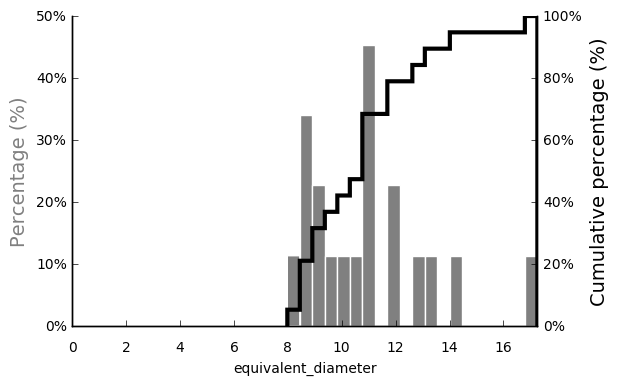

In [6]:
bubbler = CannyPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
nbubbles, marker_image, props = bubble_properties_calculate(result)
fig, axs = bubble_properties_plot(props, "equivalent_diameter")
plt.savefig('BSDhist')

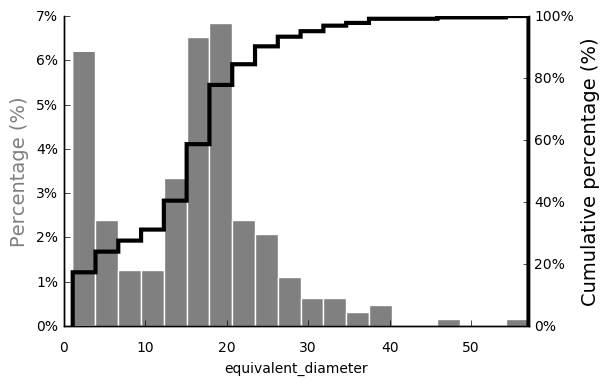

In [14]:
bubbler = AdaptiveThresholdPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run(91, 18, 3, 1, 1)
nbubbles, marker_image, props = bubble_properties_calculate(result)
fig, axs = bubble_properties_plot(props, "equivalent_diameter")
#plt.savefig('BSDhist')